In [1]:
import json
import numpy as np 
from sklearn.model_selection import train_test_split
import keras as keras

DATASET_PATH = "data.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp: 
        data = json.load(fp)

    # convert lists into numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])

    return inputs, targets

if __name__ == "__main__":
    # load data
    inputs, targets = load_data(DATASET_PATH) 

    # split data into train and test sets 
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, 
                                                                            targets,
                                                                           test_size=0.3)

    # build network architecture using tf and keras 
    model = keras.Sequential([
            # input layer 
            keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),

            # 1st hidden layer
            keras.layers.Dense(512, activation="relu"),

            # 2nd hidden layer
            keras.layers.Dense(256, activation="relu"),
        
            # 3rd hidden layer
            keras.layers.Dense(64, activation="relu"),

            # output layer
            keras.layers.Dense(10, activation="softmax")
    ])

    # compile network 
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])

    model.summary()
    
    # train network
    model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test),
             epochs=50, 
             batch_size=32)

C:\Users\phoen\anaconda3\envs\tensorflow-env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 1690)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       865,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,014,218 (3.87 MB)

 Trainable params: 1,014,218 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2691 - loss: 13.9379 - val_accuracy: 0.2121 - val_loss: 2.3515
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2519 - loss: 2.0848 - val_accuracy: 0.3124 - val_loss: 2.0407
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3566 - loss: 1.8052 - val_accuracy: 0.3331 - val_loss: 2.0338
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4059 - loss: 1.6212 - val_accuracy: 0.3648 - val_loss: 1.9479
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4592 - loss: 1.5616 - val_accuracy: 0.3915 - val_loss: 1.9002
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4647 - loss: 1.4623 - val_accuracy: 0.4038 - val_loss: 1.9620
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4987 - loss: 1.3922 - val_accuracy: 0.4125 - val_loss: 1.8876
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5009 - loss: 1.3656 - val_acc

accuracy of test set is lower than that of training set because it is overfitting

## Solving Overfitting in the Model

C:\Users\phoen\anaconda3\envs\tensorflow-env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 1690)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │         865,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,014,218 (3.87 MB)

 Trainable params: 1,014,218 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.1304 - loss: 36.9558 - val_accuracy: 0.1611 - val_loss: 3.4610
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.1280 - loss: 6.3372 - val_accuracy: 0.1040 - val_loss: 3.5003
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.1219 - loss: 4.4072 - val_accuracy: 0.1004 - val_loss: 3.5033
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.1280 - loss: 3.8397 - val_accuracy: 0.0964 - val_loss: 3.4977
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.1189 - loss: 3.7388 - val_accuracy: 0.0977 - val_loss: 3.4959
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.1264 - loss: 3.6522 - val_accuracy: 0.0980 - val_loss: 3.4826
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.1163 - loss: 3.5847 - val_accuracy: 0.0987 - val_loss: 3.4726
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.1178 - loss: 3.5320 - val_acc

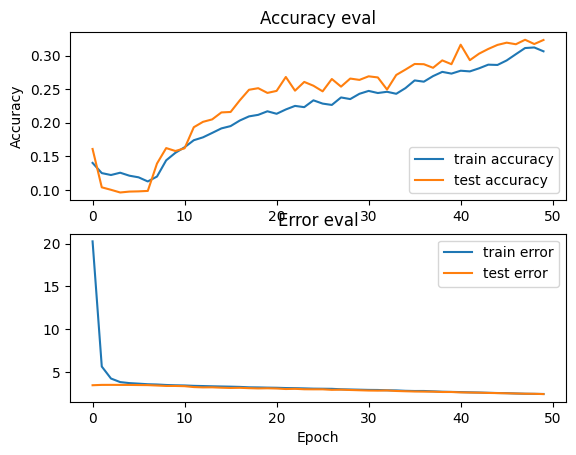

In [7]:
import json
import numpy as np 
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt 

DATASET_PATH = "data.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp: 
        data = json.load(fp)

    # convert lists into numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])

    return inputs, targets


def plot_history(history):
    fig, axs = plt.subplots(2) 

    # create accuracy subplot 
    axs[0].plot(history.history["accuracy"], label="train accuracy") # the accuracy of the train set is stored in a dict called history and the key is history
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error subplot
    axs[1].plot(history.history["loss"], label="train error") # the accuracy of the train set is stored in a dict called history and the key is history
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


if __name__ == "__main__":
    # load data
    inputs, targets = load_data(DATASET_PATH) 

    # split data into train and test sets 
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, 
                                                                            targets,
                                                                           test_size=0.3)

    # build network architecture using tf and keras 
    model = keras.Sequential([
            # input layer 
            keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),

            # 1st hidden layer
            keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
            keras.layers.Dropout(0.3),

            # 2nd hidden layer
            keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
            keras.layers.Dropout(0.3),
        
            # 3rd hidden layer
            keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
            keras.layers.Dropout(0.3),

            # output layer
            keras.layers.Dense(10, activation="softmax")
    ])

    # compile network 
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])

    model.summary()
    
    # train network
    history = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test),
             epochs=50, 
             batch_size=32)

# plot accuracy and error over the epochs
plot_history(history)

Model has improved. Compared to before:
- test accuracy (val_accuracy) > train accuracy(val_loss) , overall
- test error(val_loss) is roughly the same as train error (loss)